In [205]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [206]:
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [208]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


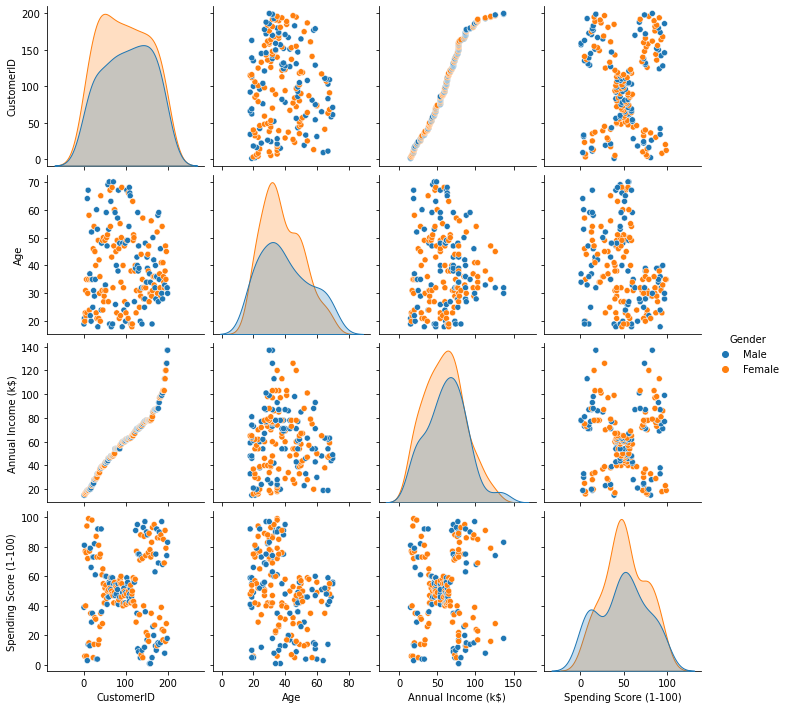

In [209]:
sns.pairplot(data, hue='Gender')

# ***Pré-processamento: ✅***
1.   Lidar com itens ausentes
2.   Remova alguns outliers
3.   Formato de dados padronizado 
4.   Aplicar Elbow para ver quantidade de clusters



In [210]:
# Utilização apenas das colunas que precisamos para preveer
clustering_data = data.iloc[:,[3, 4]].values

In [211]:
scaler = MinMaxScaler()
clustering_data = scaler.fit_transform(clustering_data)

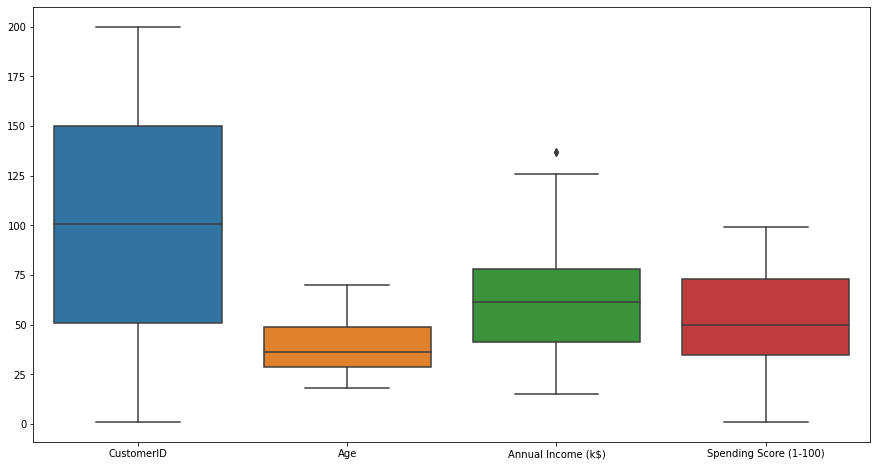

In [212]:
plt.figure(figsize=[15,8])
sns.boxplot(data=data)

In [213]:
# Remoção de outliers:
print("Old Shape: ", data.shape)
q1 = data['Annual Income (k$)'].quantile(0.25)
q3 = data['Annual Income (k$)'].quantile(0.75)
iqr = q3 - q1
lower_bound  = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
data = data.drop(data[data['Annual Income (k$)'] < lower_bound].index)
data = data.drop(data[data['Annual Income (k$)'] > upper_bound].index)
print("New Shape: ", data.shape)

Old Shape:  (200, 5)
New Shape:  (198, 5)


In [214]:
# Elbow para descobrir o número de clusters
elbow = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_data)
    elbow.append(kmeans.inertia_)

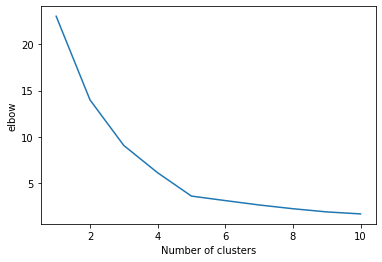

In [215]:
plt.plot(range(1, 11), elbow)
plt.xlabel('Number of clusters')
plt.ylabel('elbow')
plt.show()

Aplicação do KMEANS:

- Podemos perceber através do Elbow, que a melhor quantidade de Clusters possíveis é 5, pois é aonde a curva de cotovelo fica mais acentuada.

In [216]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(clustering_data)

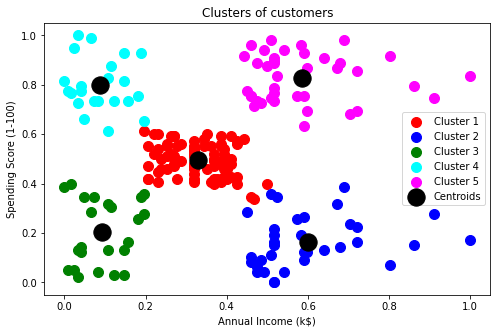

In [217]:
plt.figure(figsize=(8,5))
plt.scatter(clustering_data[Y == 0, 0], clustering_data[Y == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(clustering_data[Y == 1, 0], clustering_data[Y == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(clustering_data[Y == 2, 0], clustering_data[Y == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(clustering_data[Y == 3, 0], clustering_data[Y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(clustering_data[Y == 4, 0], clustering_data[Y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [218]:
score = silhouette_score(clustering_data, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.559


In [219]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [220]:
clustering_data_all = data.iloc[:, 2:5].values

In [221]:
scaler = MinMaxScaler()
clustering_data_all = scaler.fit_transform(clustering_data_all)

In [222]:
limit = int((clustering_data_all.shape[0] // 2) ** 0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(clustering_data_all)
    pred = model.predict(clustering_data_all)
    score = silhouette_score(clustering_data_all, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.357
Silhouette Score k = 3: 0.364
Silhouette Score k = 4: 0.398
Silhouette Score k = 5: 0.410
Silhouette Score k = 6: 0.431
Silhouette Score k = 7: 0.429
Silhouette Score k = 8: 0.418
Silhouette Score k = 9: 0.430


In [223]:
# Elbow para descobrir o número de clusters
elbow = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(clustering_data_all)
    elbow.append(kmeans.inertia_)

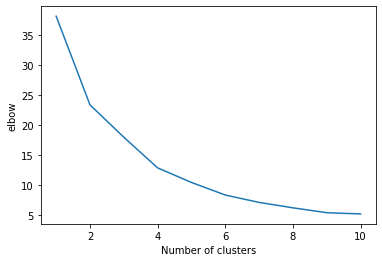

In [224]:
plt.plot(range(1, 11), elbow)
plt.xlabel('Number of clusters')
plt.ylabel('elbow')
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_all = kmeans.fit_predict(clustering_data_all)

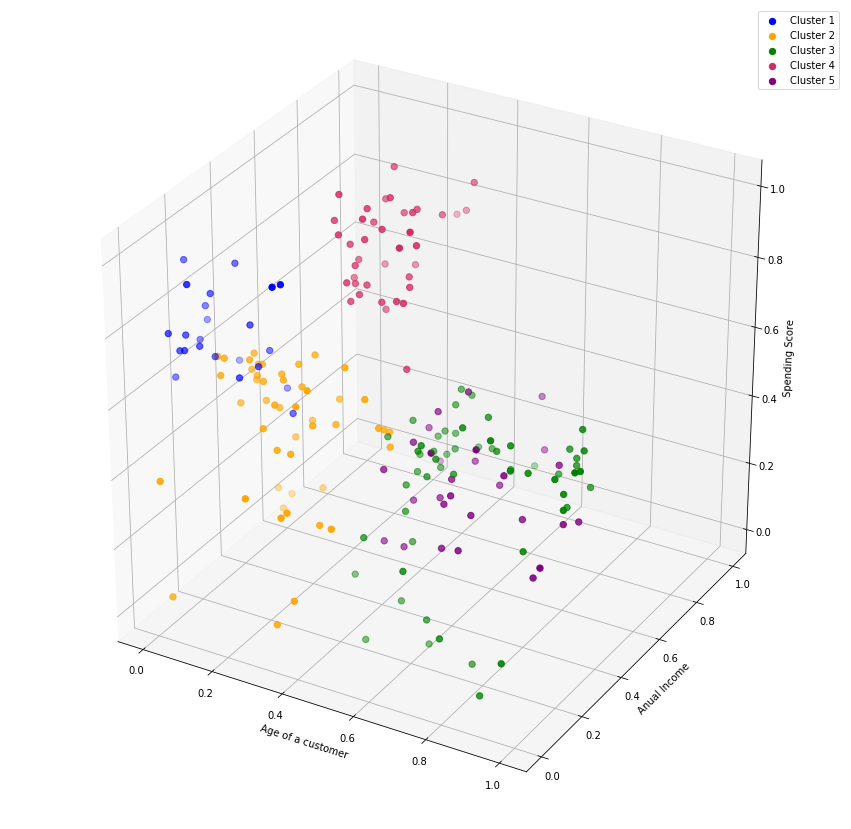

In [226]:
fig = plt.figure(figsize = (15, 15))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(clustering_data_all[Y_all == 0, 0], clustering_data_all[Y_all == 0, 1], clustering_data_all[Y_all == 0, 2], s = 40 , color = 'blue', label = 'Cluster 1')
ax.scatter(clustering_data_all[Y_all == 1, 0], clustering_data_all[Y_all == 1, 1], clustering_data_all[Y_all == 1, 2], s = 40 , color = 'orange', label = 'Cluster 2')
ax.scatter(clustering_data_all[Y_all == 2, 0], clustering_data_all[Y_all == 2, 1], clustering_data_all[Y_all == 2, 2], s = 40 , color = 'green', label = 'Cluster 3')
ax.scatter(clustering_data_all[Y_all == 3, 0], clustering_data_all[Y_all == 3, 1], clustering_data_all[Y_all == 3, 2], s = 40 , color = '#D12B60', label = 'Cluster 4')
ax.scatter(clustering_data_all[Y_all == 4, 0], clustering_data_all[Y_all == 4, 1], clustering_data_all[Y_all == 4, 2], s = 40 , color = 'purple', label = 'Cluster 5')

ax.set_xlabel('Age of a customer')
ax.set_ylabel('Anual Income')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

In [227]:
score = silhouette_score(clustering_data_all, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.410
